# Introduction to Quantum Information and Quantum Machine Learning

## Labs 2

Mateusz Tabaszewski 151945

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import Aer
from qiskit.compiler import transpile
from qiskit.visualization import *
from numpy import pi
from qiskit.visualization import plot_histogram
from qiskit.transpiler import generate_preset_pass_manager

In [2]:
backend = Aer.get_backend('statevector_simulator')
nx=2
shots=2048

In [3]:
def run_simple_circuit(nx, shots, backend, gate_list, measurement=None):
    if measurement is not None:
        if measurement == "XX":
            gate_list += [
                    ("barrier", (0, 1)),
                    ("h", 0),
                    ("h", 1),
                    ("measure", (0, 0)),
                    ("measure", (1, 1))
            ]
        elif measurement == "YY":
            gate_list += [
                    ("barrier", (0, 1)),
                    ("sdg", 0),
                    ("sdg", 1),
                    ("h", 0),
                    ("h", 1),
                    ("measure", (0, 0)),
                    ("measure", (1, 1))
            ]
        elif measurement == "XZ":
            gate_list += [
                    ("barrier", (0, 1)),
                    ("measure", (0, 0)),
                    ("h", 1),
                    ("measure", (1, 1))
            ]
        else:
            raise ValueError("Invalid Measurement Type")
        
    qx = QuantumRegister(nx)
    cx = ClassicalRegister(nx)
    circuit = QuantumCircuit(qx, cx)

    for gate, qubits in gate_list:
        if gate == "x":
            circuit.x(qx[qubits])
        elif gate == "h":
            circuit.h(qx[qubits])
        elif gate == "sdg":
            circuit.sdg(qx[qubits])
        elif gate == "cx":
            control, target = qubits
            circuit.cx(qx[control], qx[target])
        elif gate == "barrier":
            if isinstance(qubits, tuple):
                circuit.barrier(qx[qubits[0]], qx[qubits[1]])
            else:
                circuit.barrier(qx[qubits])
        elif gate == "measure":
            q, c = qubits
            circuit.measure(qx[q], cx[c])

    results = []
    for i in range(3):
        job_result = backend.run(transpile(circuit, backend), shots=shots).result()
        results.append(job_result)

    job_result = results[-1]
    counts = job_result.get_counts(circuit)
    return circuit, results, counts


## Task 1

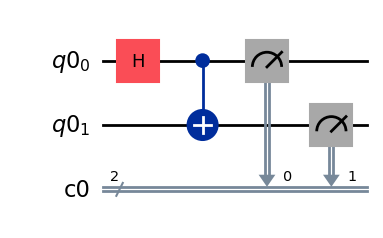

In [4]:
gates = [
    ("h", 0),
    ("cx", (0, 1)),
    ("measure", (0, 0)),
    ("measure", (1, 1))
]

circuit, results, counts = run_simple_circuit(
    nx=nx,
    shots=shots,
    backend=backend,
    gate_list=gates
)

circuit.draw(output="mpl")

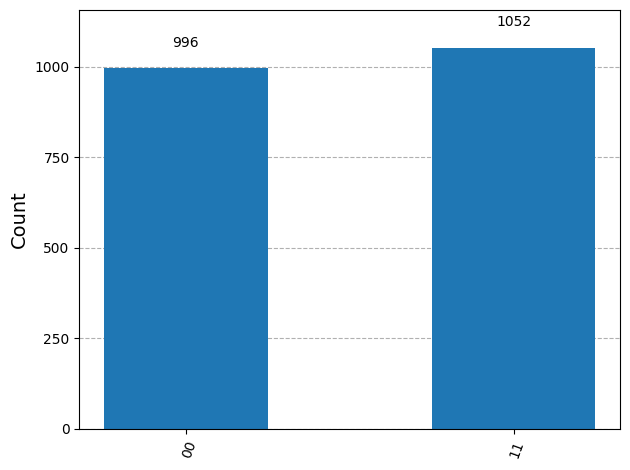

In [5]:
plot_histogram(counts)

## Task 2

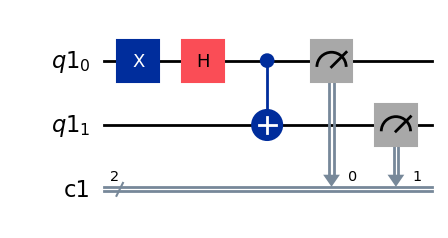

In [6]:
gates = [
    ("x", 0),
    ("h", 0),
    ("cx", (0, 1)),
    ("measure", (0, 0)),
    ("measure", (1, 1))
]

circuit, results, counts = run_simple_circuit(
    nx=nx,
    shots=shots,
    backend=backend,
    gate_list=gates
)

circuit.draw(output="mpl")

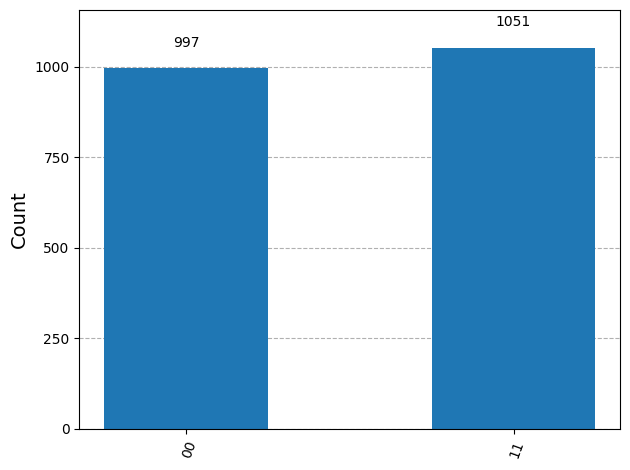

In [7]:
plot_histogram(counts)

## Task 3

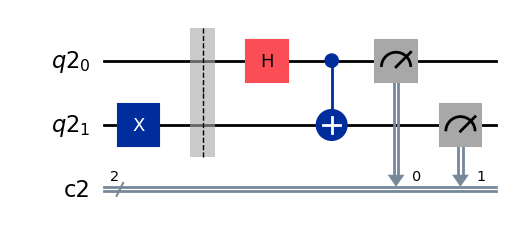

In [8]:
gates = [
    ("x", 1),
    ("barrier", (0, 1)),
    ("h", 0),
    ("cx", (0, 1)),
    ("measure", (0, 0)),
    ("measure", (1, 1))
]

circuit, results, counts = run_simple_circuit(
    nx=nx,
    shots=shots,
    backend=backend,
    gate_list=gates
)

circuit.draw(output="mpl")

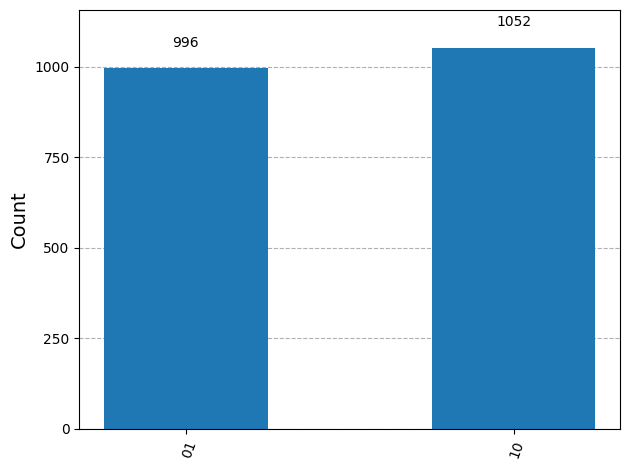

In [9]:
plot_histogram(counts)

## Task 4

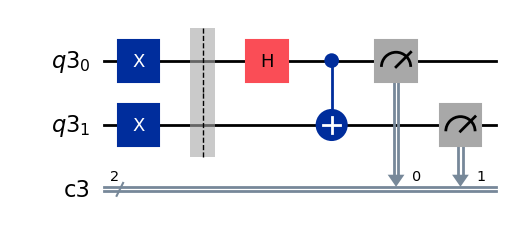

In [10]:
gates = [
    ("x", 0),
    ("x", 1),
    ("barrier", (0, 1)),
    ("h", 0),
    ("cx", (0, 1)),
    ("measure", (0, 0)),
    ("measure", (1, 1))
]

circuit, results, counts = run_simple_circuit(
    nx=nx,
    shots=shots,
    backend=backend,
    gate_list=gates
)

circuit.draw(output="mpl")

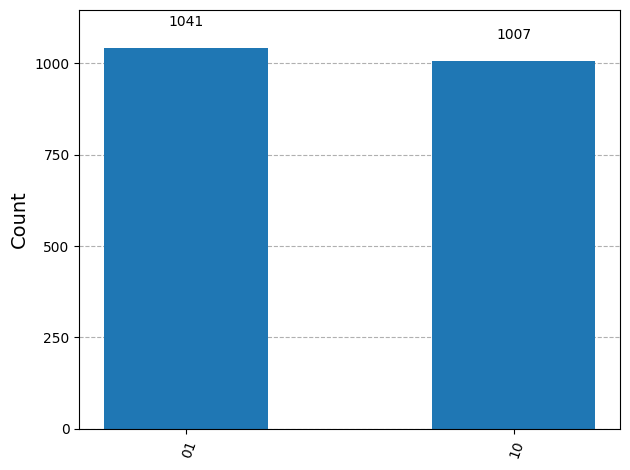

In [11]:
plot_histogram(counts)

## Task 5

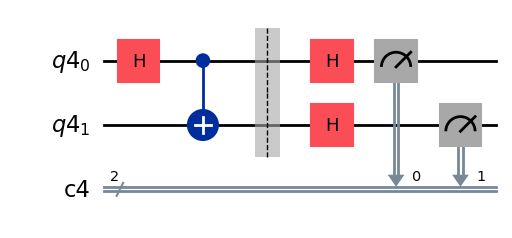

In [12]:
gates = [
    ("h", 0),
    ("cx", (0, 1))
]

circuit, results, counts = run_simple_circuit(
    nx=nx,
    shots=shots,
    backend=backend,
    gate_list=gates,
    measurement="XX"
)

circuit.draw(output="mpl")

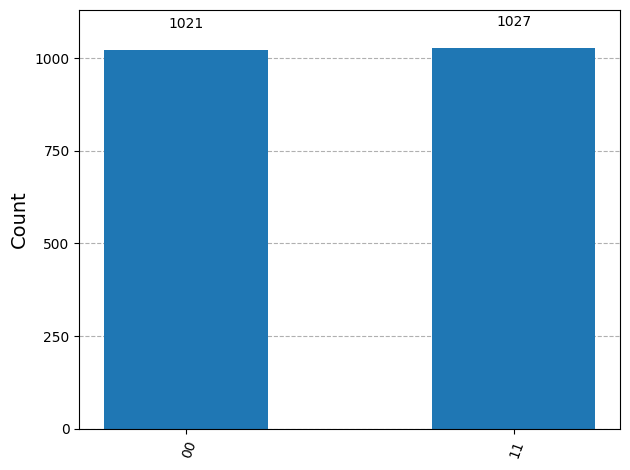

In [13]:
plot_histogram(counts)

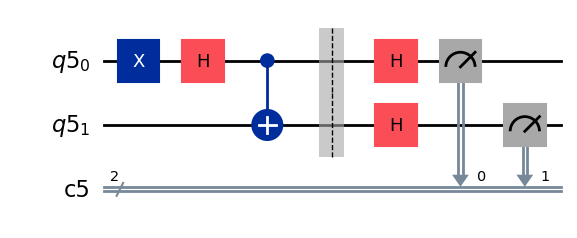

In [14]:
gates = [
    ("x", 0),
    ("h", 0),
    ("cx", (0, 1))
]

circuit, results, counts = run_simple_circuit(
    nx=nx,
    shots=shots,
    backend=backend,
    gate_list=gates,
    measurement="XX"
)

circuit.draw(output="mpl")

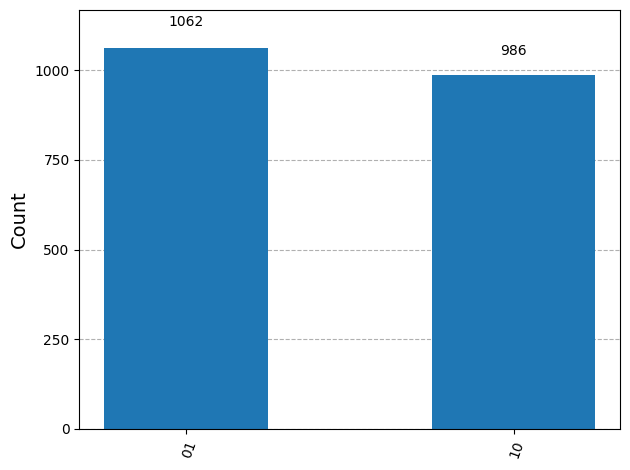

In [15]:
plot_histogram(counts)

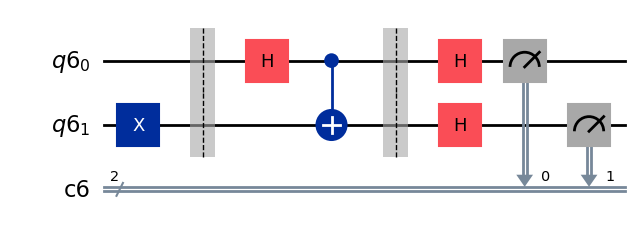

In [16]:
gates = [
    ("x", 1),
    ("barrier", (0, 1)),
    ("h", 0),
    ("cx", (0, 1))
]

circuit, results, counts = run_simple_circuit(
    nx=nx,
    shots=shots,
    backend=backend,
    gate_list=gates,
    measurement="XX"
)

circuit.draw(output="mpl")

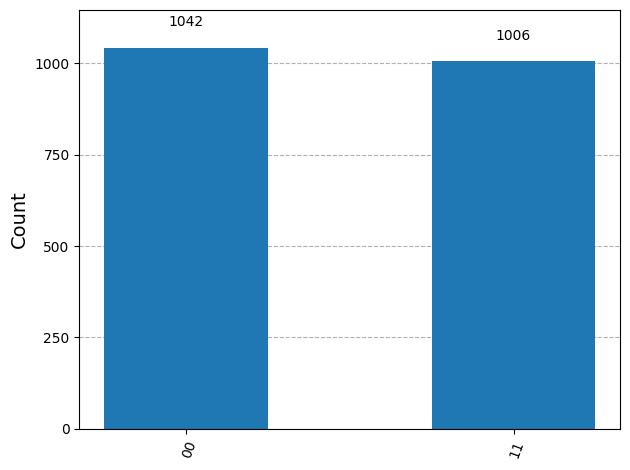

In [17]:
plot_histogram(counts)

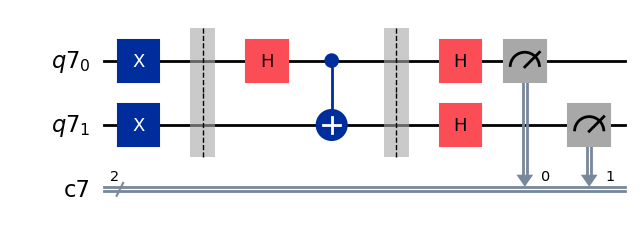

In [18]:
gates = [
    ("x", 0),
    ("x", 1),
    ("barrier", (0, 1)),
    ("h", 0),
    ("cx", (0, 1))
]

circuit, results, counts = run_simple_circuit(
    nx=nx,
    shots=shots,
    backend=backend,
    gate_list=gates,
    measurement="XX"
)

circuit.draw(output="mpl")

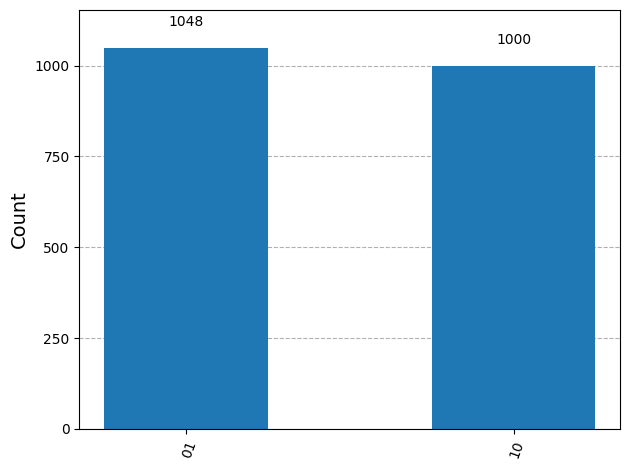

In [19]:
plot_histogram(counts)

## Task 6

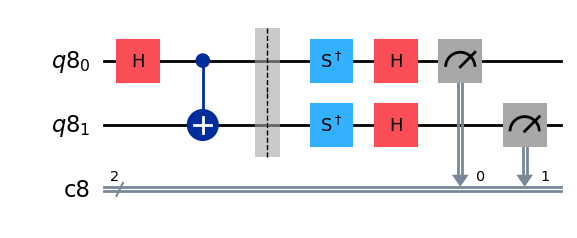

In [20]:
gates = [
    ("h", 0),
    ("cx", (0, 1)),
]

circuit, results, counts = run_simple_circuit(
    nx=nx,
    shots=shots,
    backend=backend,
    gate_list=gates,
    measurement="YY"
)

circuit.draw(output="mpl")

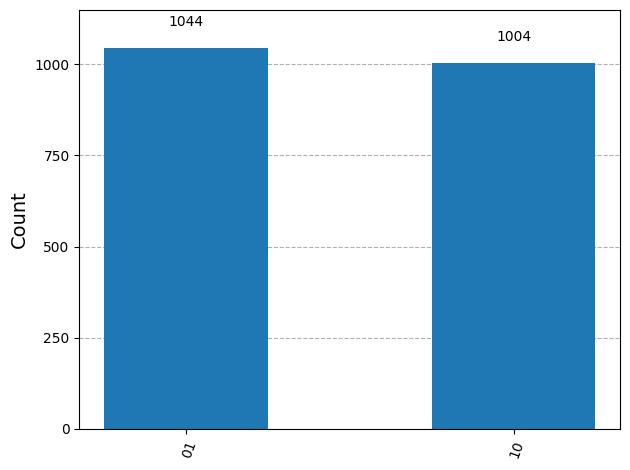

In [21]:
plot_histogram(counts)

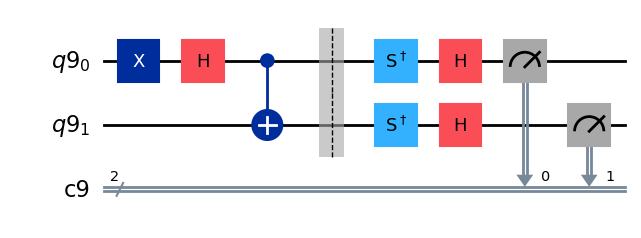

In [22]:
gates = [
    ("x", 0),
    ("h", 0),
    ("cx", (0, 1))
]

circuit, results, counts = run_simple_circuit(
    nx=nx,
    shots=shots,
    backend=backend,
    gate_list=gates,
    measurement="YY"
)

circuit.draw(output="mpl")

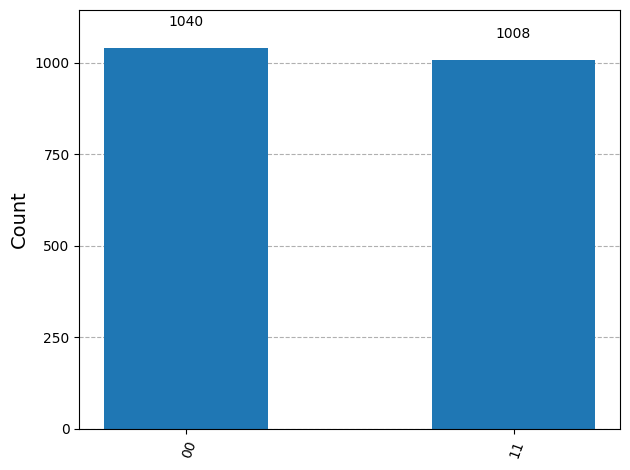

In [23]:
plot_histogram(counts)

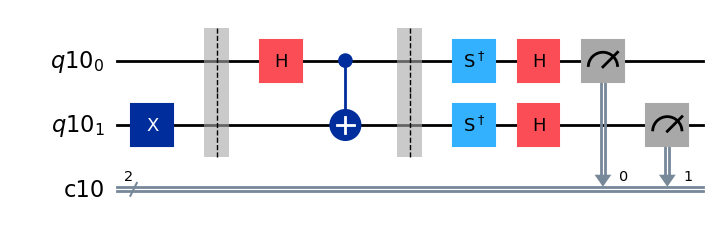

In [24]:
gates = [
    ("x", 1),
    ("barrier", (0, 1)),
    ("h", 0),
    ("cx", (0, 1))
]

circuit, results, counts = run_simple_circuit(
    nx=nx,
    shots=shots,
    backend=backend,
    gate_list=gates,
    measurement="YY"
)

circuit.draw(output="mpl")

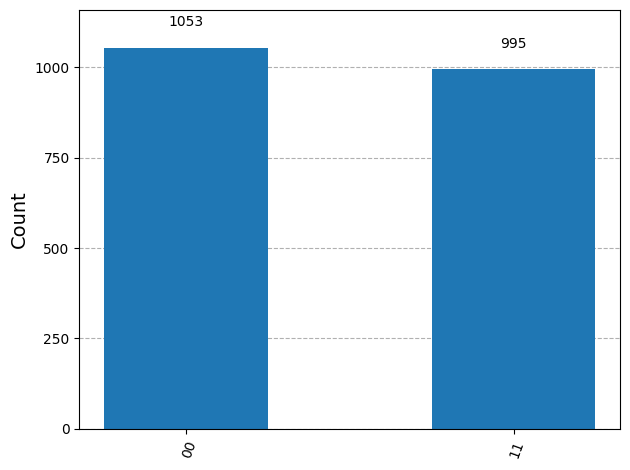

In [25]:
plot_histogram(counts)

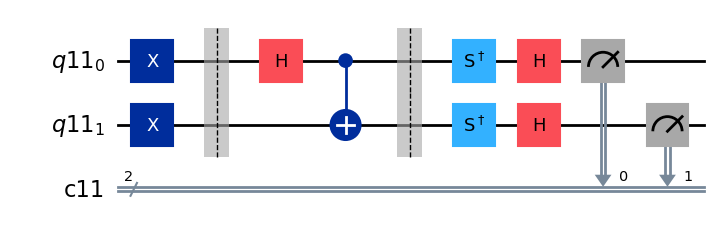

In [26]:
gates = [
    ("x", 0),
    ("x", 1),
    ("barrier", (0, 1)),
    ("h", 0),
    ("cx", (0, 1))
]

circuit, results, counts = run_simple_circuit(
    nx=nx,
    shots=shots,
    backend=backend,
    gate_list=gates,
    measurement="YY"
)

circuit.draw(output="mpl")

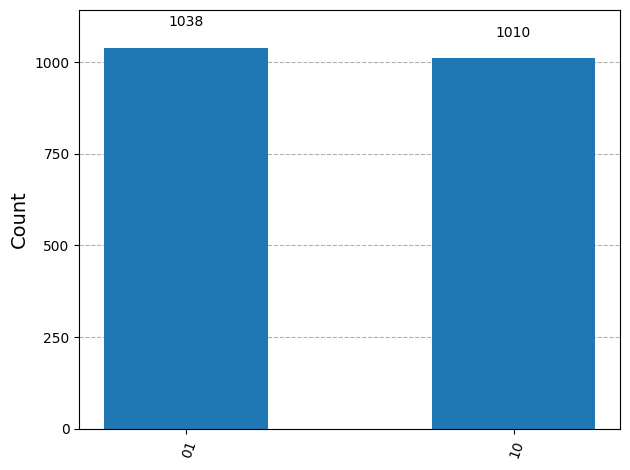

In [27]:
plot_histogram(counts)

## Task 7

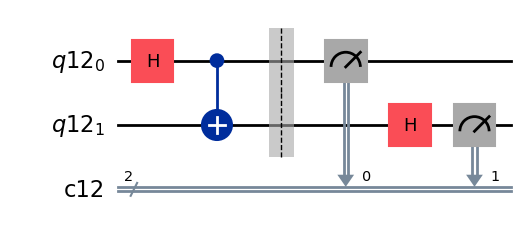

In [28]:
gates = [
    ("h", 0),
    ("cx", (0, 1))
]

circuit, results, counts = run_simple_circuit(
    nx=nx,
    shots=shots,
    backend=backend,
    gate_list=gates,
    measurement="XZ"
)

circuit.draw(output="mpl")

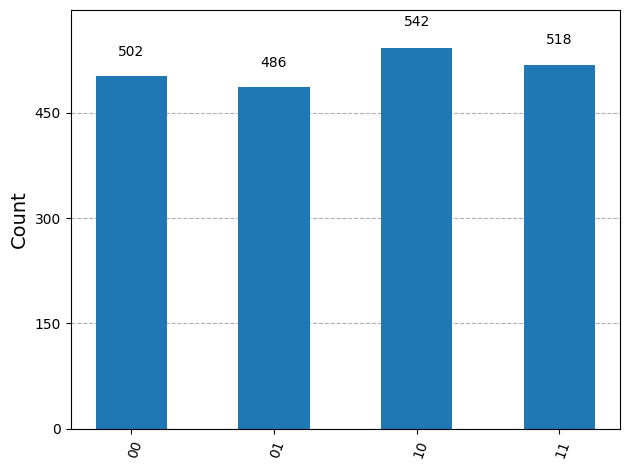

In [29]:
plot_histogram(counts)

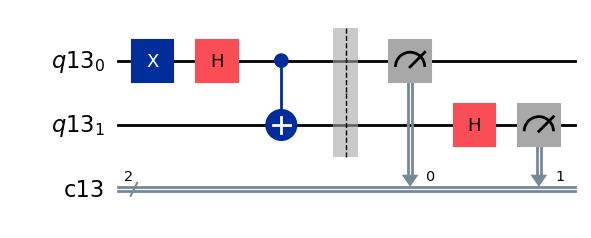

In [30]:
gates = [
    ("x", 0),
    ("h", 0),
    ("cx", (0, 1))
]

circuit, results, counts = run_simple_circuit(
    nx=nx,
    shots=shots,
    backend=backend,
    gate_list=gates,
    measurement="XZ"
)

circuit.draw(output="mpl")

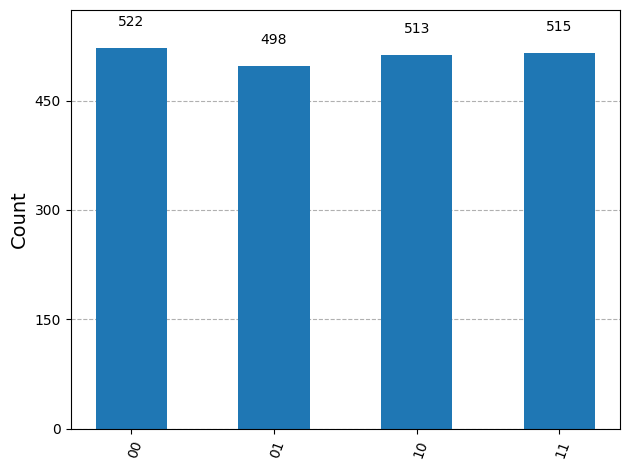

In [31]:
plot_histogram(counts)

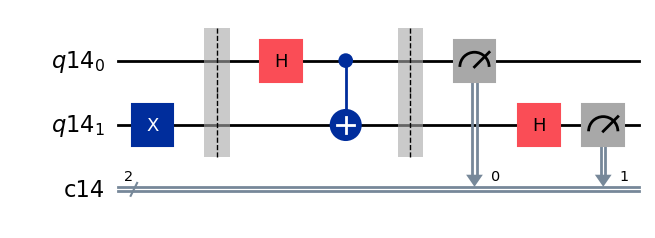

In [32]:
gates = [
    ("x", 1),
    ("barrier", (0, 1)),
    ("h", 0),
    ("cx", (0, 1))
]

circuit, results, counts = run_simple_circuit(
    nx=nx,
    shots=shots,
    backend=backend,
    gate_list=gates,
    measurement="XZ"
)

circuit.draw(output="mpl")

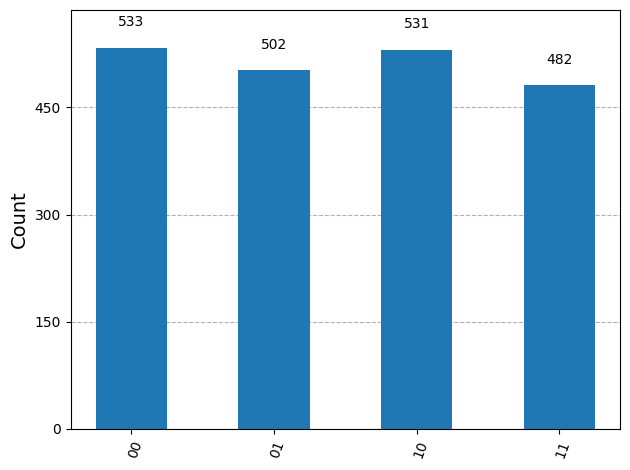

In [33]:
plot_histogram(counts)

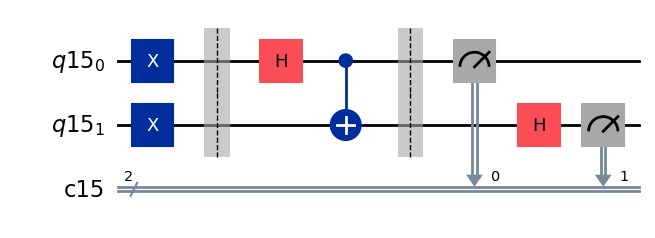

In [34]:
gates = [
    ("x", 0),
    ("x", 1),
    ("barrier", (0, 1)),
    ("h", 0),
    ("cx", (0, 1))
]

circuit, results, counts = run_simple_circuit(
    nx=nx,
    shots=shots,
    backend=backend,
    gate_list=gates,
    measurement="XZ"
)

circuit.draw(output="mpl")

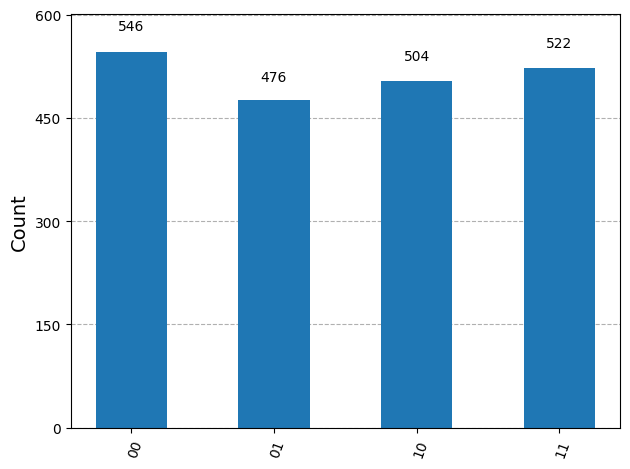

In [35]:
plot_histogram(counts)

## Calculations

### Task 2

![task2](figs-labs2/task2.jpg)

![task2matrix](figs-labs2/task2-matrix.jpg)

### Task 3

![task3](figs-labs2/task3.jpg)

![task3matrix](figs-labs2/task3-matrix.jpg)

### Task 4

![task4](figs-labs2/task4.jpg)